In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('spam.csv', encoding='windows-1252')
df.shape


(5572, 5)

In [3]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
932,ham,So do you have samus shoulders yet,NaN,NaN,NaN
861,ham,Your brother is a genius,NaN,NaN,NaN
142,ham,A swt thought: \Nver get tired of doing little...,NaN,NaN,NaN
4826,ham,Yup but it's not giving me problems now so may...,NaN,NaN,NaN
4724,ham,There'll be a minor shindig at my place later ...,NaN,NaN,NaN


##1.Data cleaning



In [5]:
## 1 data cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample(4)

,target,text
1960,spam,Guess what! Somebody you know secretly fancies...
531,ham,What Today-sunday..sunday is holiday..so no wo...
3393,ham,Bull. Your plan was to go floating off to IKEA...
1402,ham,You have registered Sinco as Payee. Log in at ...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target']) 


In [12]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#ctrl + enter for run
# B ti insert new cell

In [15]:
df.duplicated().sum()
#remove duplicates

403

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape
#no of rows and columns


(5169, 2)

## 2 EDA


In [19]:
#exploratory data analysis
df['target'].value_counts()
# value counts is for 

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x25895048b90>,
 [Text(-1.0144997251399075, 0.4251944351600247, ' not spam'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

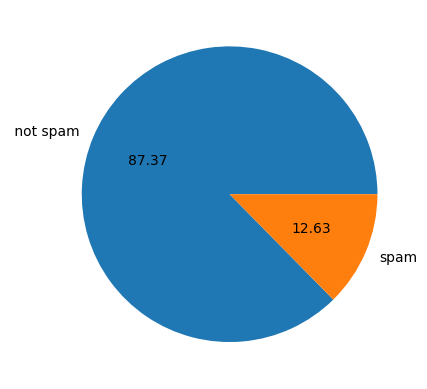

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() ,labels=[' not spam','spam'], autopct="%0.2f")

In [21]:
import nltk
df['text']


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [22]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [23]:
df['length']=df['text'].apply(len)

In [24]:
df.head()

,target,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()


,target,text,length,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [28]:
df.head()


,target,text,length,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['length','num_words','num_sentences']].describe()

,length,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['target']==0][['length','num_words','num_sentences']].describe()
#not spam (ham)  msgs

,length,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target']==1][['length','num_words','num_sentences']].describe()
# spam msgs
#137 char per spam msg (mean)
#comparitively spam msgs are lengthy


,length,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='length', ylabel='Count'>

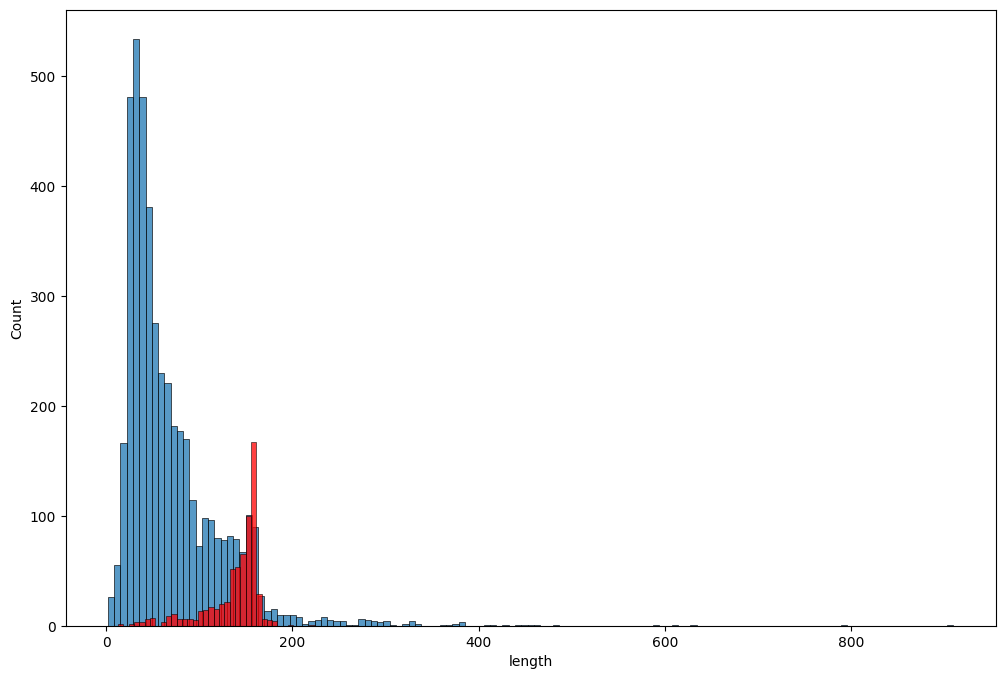

In [32]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['length'])
sns.histplot(df[df['target']==1]['length'],color='red') #spam length is more

In [33]:
#pip install seaborn


<Axes: xlabel='num_words', ylabel='Count'>

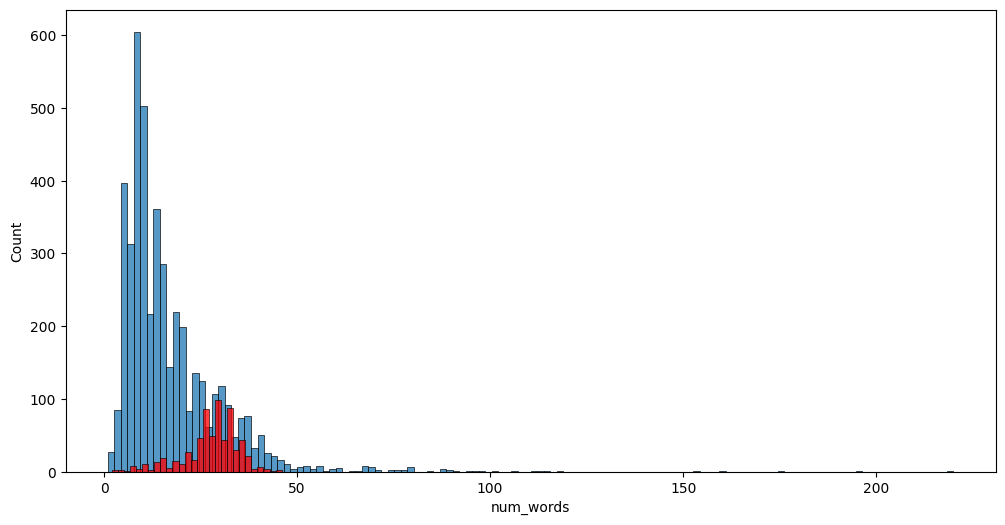

In [34]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red') #spam msg -> length is more

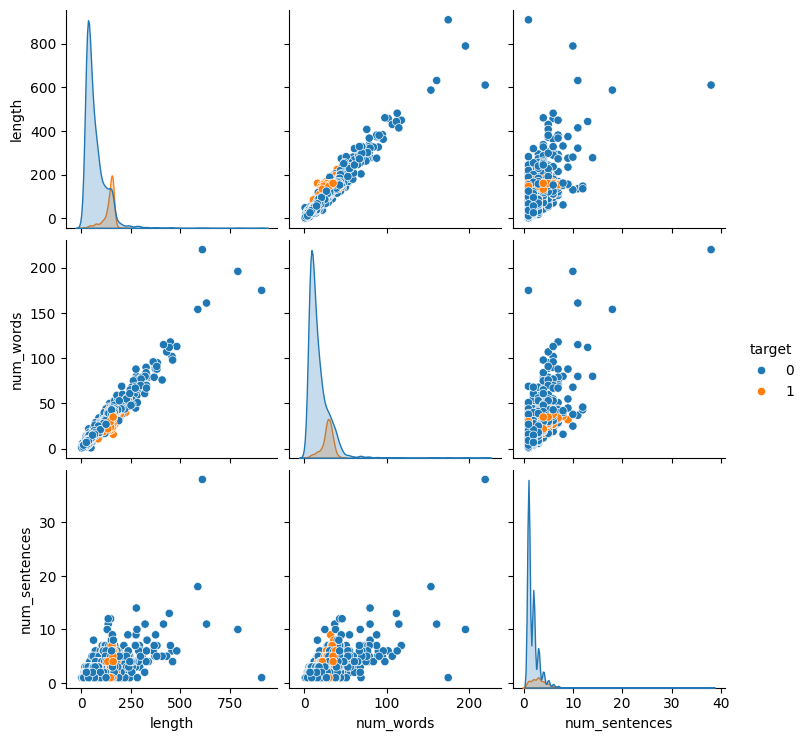

In [35]:
sns.pairplot(df,hue='target')


<Axes: >

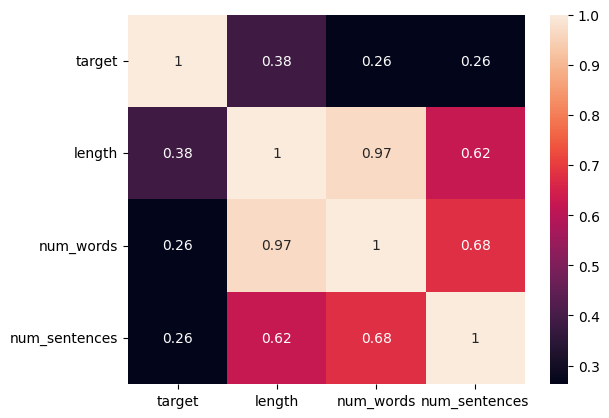

In [36]:
#these separate (distant) points are outliers
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True)

## 3.Data preprocessing

In [37]:
# lower case , tokenisation , removing stop words , spl chars ,
# and punctuation and stemming (base verb form)

In [38]:
from nltk.corpus import stopwords
sw=stopwords.words('english')

In [39]:
import string
punc=string.punctuation

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


'teach'

In [41]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
   
    text=y[:]
    y.clear()
    for i in text:
        if i not in punc and i not in sw:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y) # list to string (printing )

#transform_text("  Hi ,How Are you,, 20% ") # how are you are all stop words
    

'hi 20 teach nivi'

In [2]:
sw=stopwords.words('english')


NameError: name 'stopwords' is not defined

In [43]:
#df['text'][0]
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [45]:
df['transformed_text']=df['text'].apply(transform_text)
df.head()


,target,text,length,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
#pip install WordCloud
#!pip install jupyterlab
#pip install jupyterlab-lsp

In [49]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [50]:
#df[df['target']==1]['transformed_text'].str.cat(sep=" ")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

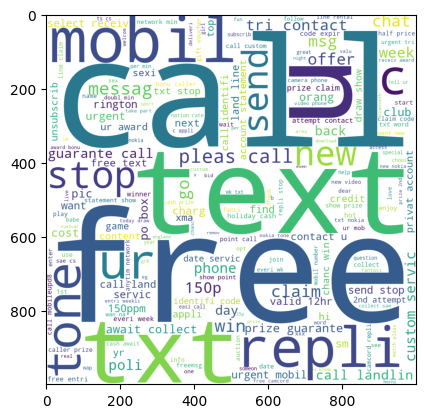

In [51]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)


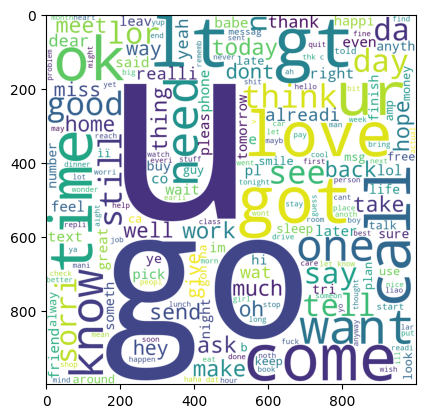

In [52]:
# for ham msgs
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)


In [54]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word) # 

In [55]:
#spam_corpus
len(spam_corpus)

9939

In [56]:
from collections import Counter
Counter(spam_corpus).most_common(30) #top 30 words is displayed

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [57]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30)) #top 30 words is displayed in spam 

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\nivis\AppData\Local\Temp\ipykernel_20592\1429070209.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=top_df, palette='husl')


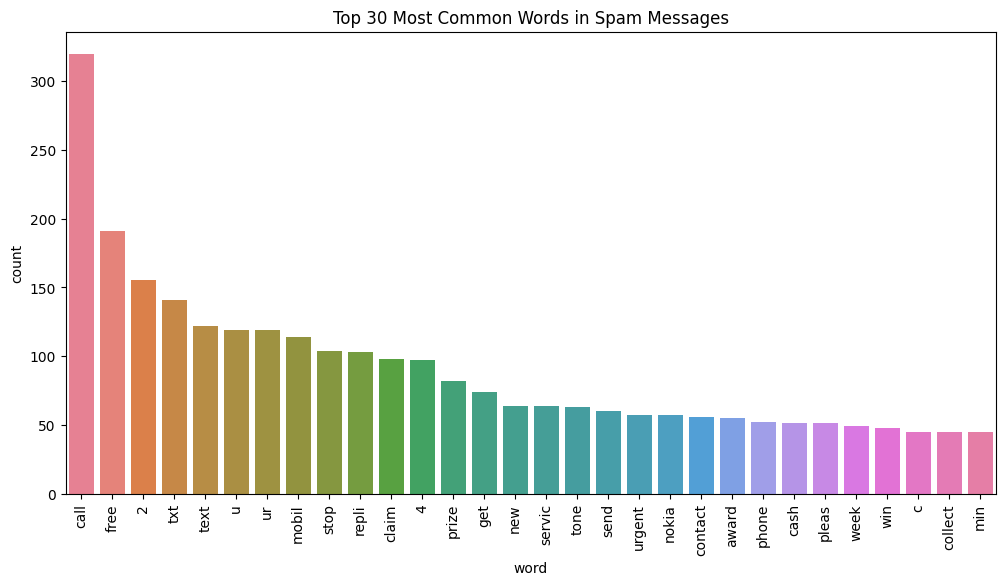

In [58]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count top 30 words in spam_corpus
top_words = Counter(spam_corpus).most_common(30)
top_df = pd.DataFrame(top_words, columns=['word', 'count'])

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=top_df, palette='husl')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.xticks(rotation='vertical')
plt.show()


In [60]:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word) # 
#ham_corpus
pd.DataFrame(Counter(ham_corpus).most_common(30))


,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\nivis\AppData\Local\Temp\ipykernel_20592\3644162813.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=most_df, palette='husl')


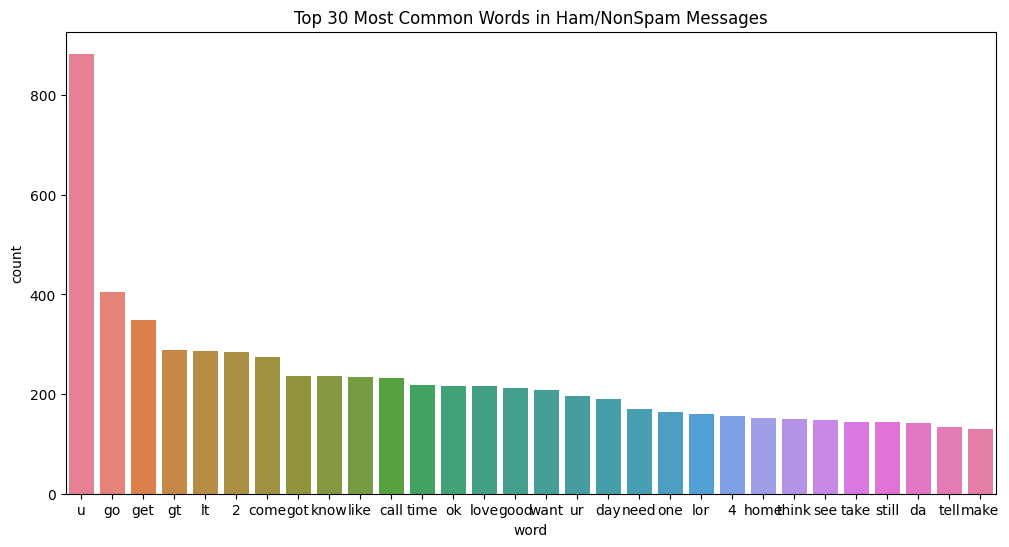

In [61]:
mostw=Counter(ham_corpus).most_common(30)
most_df = pd.DataFrame(mostw, columns=['word', 'count'])

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=most_df, palette='husl')
plt.title('Top 30 Most Common Words in Ham/NonSpam Messages')
#plt.xlabel('Count')
plt.show()




## 4. MODEL BUILDING

In [62]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv=CountVectorizer() #bag of words
tfidf=TfidfVectorizer(max_features=3000)
#tfidf=TfidfVectorizer(max_features=3000)

In [63]:
#X=cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()


In [64]:
X.shape
#5169 sms , 6708 words 

(5169, 3000)

In [65]:
y= df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# testing data 20%

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
# object creation

In [68]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [69]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# using tfidf precion is 1 but accuracy thoda kam ho gaya

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [70]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3)) # true +,- false + ,-
print(precision_score(y_test,y_pred3))
#bernoulli better model

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [71]:
#!pip install xgboost

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
# creating objects for everything

In [74]:
clfs={
    'SVC':svc,
    'KN':knc,
    'DT':dtc,
    'NB':mnb,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
    
    
}

In [75]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):

    # Ensure y is 1D
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)  # prevent error if no positive preds
    return accuracy, precision


In [76]:
#train_classifier(svc,X_train,X_test,y_train,y_test)
train_classifier(svc, X_train, y_train, X_test, y_test)


(0.9758220502901354, 0.9747899159663865)

In [77]:
accscores=[]
precscores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision= train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ",name)
    print("accuracy -" ,current_accuracy)
    print("Precision -" ,current_precision)
    accscores.append(current_accuracy)
    precscores.append(current_precision)

For  SVC
accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For  KN
accuracy - 0.9052224371373307
Precision - 1.0
For  DT
accuracy - 0.9303675048355899
Precision - 0.8173076923076923
For  NB
accuracy - 0.9709864603481625
Precision - 1.0
For  LR
accuracy - 0.9584139264990329
Precision - 0.9702970297029703
For  RF
accuracy - 0.9758220502901354
Precision - 0.9829059829059829
For  AdaBoost
accuracy - 0.9245647969052224
Precision - 0.8488372093023255
For  BgC
accuracy - 0.9584139264990329
Precision - 0.8682170542635659
For  ETC
accuracy - 0.9748549323017408
Precision - 0.9745762711864406
For  GBDT
accuracy - 0.9468085106382979
Precision - 0.9191919191919192
For  xgb
accuracy - 0.9671179883945842
Precision - 0.9482758620689655


In [78]:
perf_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accscores,'Precision':precscores}).sort_values('Accuracy',ascending=False)
perf_df


,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
5,RF,0.975822,0.982906
8,ETC,0.974855,0.974576
3,NB,0.970986,1.000000
10,xgb,0.967118,0.948276
4,LR,0.958414,0.970297
7,BgC,0.958414,0.868217
9,GBDT,0.946809,0.919192
2,DT,0.930368,0.817308
6,AdaBoost,0.924565,0.848837


In [79]:
perf_df1=pd.melt(perf_df,id_vars='Algorithm')
perf_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,RF,Accuracy,0.975822
2,ETC,Accuracy,0.974855
3,NB,Accuracy,0.970986
4,xgb,Accuracy,0.967118
5,LR,Accuracy,0.958414
6,BgC,Accuracy,0.958414
7,GBDT,Accuracy,0.946809
8,DT,Accuracy,0.930368
9,AdaBoost,Accuracy,0.924565


In [80]:
from sklearn.model_selection import train_test_split
cv_max = TfidfVectorizer(max_features=3000)
X_max3k = cv_max.fit_transform(df['transformed_text']).toarray()

# Now split THIS new data
X_train, X_test, y_train, y_test = train_test_split(X_max3k, y, test_size=0.2, random_state=42)


In [81]:
accscores_max=[]
precscores_max=[]
for name,clf in clfs.items():
    current_accuracy,current_precision= train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ",name)
    print("accuracy -" ,current_accuracy)
    print("Precision -" ,current_precision)
    accscores_max.append(current_accuracy)
    precscores_max.append(current_precision)

For  SVC
accuracy - 0.97678916827853
Precision - 0.9548872180451128
For  KN
accuracy - 0.9100580270793037
Precision - 1.0
For  DT
accuracy - 0.9332688588007737
Precision - 0.8275862068965517
For  NB
accuracy - 0.9729206963249516
Precision - 0.9915966386554622
For  LR
accuracy - 0.9468085106382979
Precision - 0.8688524590163934
For  RF
accuracy - 0.971953578336557
Precision - 0.9754098360655737
For  AdaBoost
accuracy - 0.9158607350096711
Precision - 0.8085106382978723
For  BgC
accuracy - 0.9622823984526112
Precision - 0.8840579710144928
For  ETC
accuracy - 0.9777562862669246
Precision - 0.9841269841269841
For  GBDT
accuracy - 0.9468085106382979
Precision - 0.96875
For  xgb
accuracy - 0.9661508704061895
Precision - 0.9435483870967742


In [82]:
# only now change tfidf (for max_features 3000)
temp_df1=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accscores_max,'Precision_max_ft_3000':precscores_max}).sort_values('Accuracy_max_ft_3000',ascending=False)
temp_df1

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
8,ETC,0.977756,0.984127
0,SVC,0.976789,0.954887
3,NB,0.972921,0.991597
5,RF,0.971954,0.975410
10,xgb,0.966151,0.943548
7,BgC,0.962282,0.884058
4,LR,0.946809,0.868852
9,GBDT,0.946809,0.968750
2,DT,0.933269,0.827586
6,AdaBoost,0.915861,0.808511


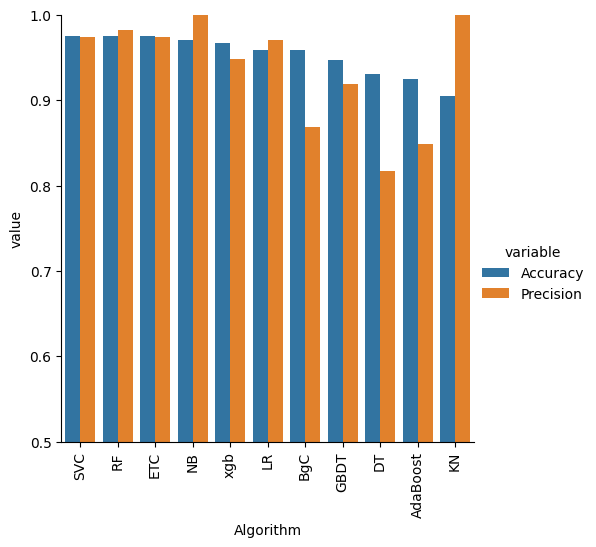

In [83]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=perf_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
perf_df.merge(temp_df1, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.975822,0.974790,0.976789,0.954887
1,RF,0.975822,0.982906,0.971954,0.975410
2,ETC,0.974855,0.974576,0.977756,0.984127
3,NB,0.970986,1.000000,0.972921,0.991597
4,xgb,0.967118,0.948276,0.966151,0.943548
5,LR,0.958414,0.970297,0.946809,0.868852
6,BgC,0.958414,0.868217,0.962282,0.884058
7,GBDT,0.946809,0.919192,0.946809,0.968750
8,DT,0.930368,0.817308,0.933269,0.827586
9,AdaBoost,0.924565,0.848837,0.915861,0.808511


In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_max=scaler.fit_transform(X)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_max, y, test_size=0.2, random_state=42) # 20 percent testing data

In [87]:
accscores_sc=[]
precscores_sc=[]
for name,clf in clfs.items():
    current_accuracy,current_precision= train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ",name)
    print("accuracy -" ,current_accuracy)
    print("Precision -" ,current_precision)
    accscores_sc.append(current_accuracy)
    precscores_sc.append(current_precision)

For  SVC
accuracy - 0.9709864603481625
Precision - 0.9136690647482014
For  KN
accuracy - 0.9100580270793037
Precision - 1.0
For  DT
accuracy - 0.9332688588007737
Precision - 0.8275862068965517
For  NB
accuracy - 0.9777562862669246
Precision - 0.9552238805970149
For  LR
accuracy - 0.9622823984526112
Precision - 0.9206349206349206
For  RF
accuracy - 0.971953578336557
Precision - 0.9754098360655737
For  AdaBoost
accuracy - 0.9158607350096711
Precision - 0.8085106382978723
For  BgC
accuracy - 0.9622823984526112
Precision - 0.8840579710144928
For  ETC
accuracy - 0.9777562862669246
Precision - 0.9841269841269841
For  GBDT
accuracy - 0.9468085106382979
Precision - 0.96875
For  xgb
accuracy - 0.9661508704061895
Precision - 0.9435483870967742


In [88]:
temp_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accscores_sc,'Precision_scaling':precscores_sc}).sort_values('Precision_scaling',ascending=False)
temp_df2

,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.910058,1.000000
8,ETC,0.977756,0.984127
5,RF,0.971954,0.975410
9,GBDT,0.946809,0.968750
3,NB,0.977756,0.955224
10,xgb,0.966151,0.943548
4,LR,0.962282,0.920635
0,SVC,0.970986,0.913669
7,BgC,0.962282,0.884058
2,DT,0.933269,0.827586


In [89]:
new_df = perf_df.merge(temp_df1,on='Algorithm')
new_df_scaled = new_df.merge(temp_df2,on='Algorithm')

In [90]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
x_char= np.hstack((X,df['length'].values.reshape(-1,1))) #num_characters is length

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accscores,'Precision_num_chars':precscores}).sort_values('Precision_num_chars',ascending=False)
temp_df

,Algorithm,Accuracy_num_chars,Precision_num_chars
1,KN,0.905222,1.000000
3,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [92]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,SVC,0.975822,0.974790,0.976789,0.954887,0.970986,0.913669,0.975822,0.974790
1,RF,0.975822,0.982906,0.971954,0.975410,0.971954,0.975410,0.975822,0.982906
2,ETC,0.974855,0.974576,0.977756,0.984127,0.977756,0.984127,0.974855,0.974576
3,NB,0.970986,1.000000,0.972921,0.991597,0.977756,0.955224,0.970986,1.000000
4,xgb,0.967118,0.948276,0.966151,0.943548,0.966151,0.943548,0.967118,0.948276
5,LR,0.958414,0.970297,0.946809,0.868852,0.962282,0.920635,0.958414,0.970297
6,BgC,0.958414,0.868217,0.962282,0.884058,0.962282,0.884058,0.958414,0.868217
7,GBDT,0.946809,0.919192,0.946809,0.968750,0.946809,0.968750,0.946809,0.919192
8,DT,0.930368,0.817308,0.933269,0.827586,0.933269,0.827586,0.930368,0.817308
9,AdaBoost,0.924565,0.848837,0.915861,0.808511,0.915861,0.808511,0.924565,0.848837


In [106]:
# run x with max_features=3000
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [107]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [95]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [96]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9849624060150376


In [97]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [98]:
from sklearn.ensemble import StackingClassifier

In [103]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [100]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9635036496350365


In [108]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))